In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the datasets
wsb_data = pd.read_csv('/content/drive/MyDrive/wallstreetbets.csv', dtype={1: str, 2: str, 3: str})
sp500_data = pd.read_csv('/content/drive/MyDrive/sp500_stocks.csv')

In [ ]:
wsb_data.shape
# sp500_data.shape

(2979131, 20)

In [ ]:
# wsb_data.drop(wsb_data[wsb_data['body']=='[deleted]'].index, inplace=True)
# wsb_data.drop(wsb_data[wsb_data['body']=='[removed]'].index, inplace=True)

In [ ]:
# Data cleaning
wsb_data = wsb_data[['body', 'score', 'created_utc']]
wsb_data = wsb_data.dropna()
sp500_data = sp500_data[['date', 'open', 'high', 'low', 'close', 'volume', 'Name']]
sp500_data = sp500_data.dropna()

In [ ]:
wsb_data.head()

,body,score,created_utc
0,[deleted],0,1400098596
1,"Lol. Yeah, Welp.",1,1412888184
2,[deleted],1,1398860210
3,Crypto miners is not a significant enough mark...,1,1392824901
4,Sold a covered call at 560. I almost wish it d...,1,1398311440


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wsb_data.isna().sum()

,0
body,0
score,0
created_utc,0


In [ ]:
# Convert the 'created_utc' column in WSB data to datetime format
wsb_data['created_utc'] = pd.to_datetime(wsb_data['created_utc'], unit='s')

In [ ]:
# Convert the 'date' column in the S&P 500 dataset to datetime
sp500_data['date'] = pd.to_datetime(sp500_data['date'])

In [ ]:
# Merge WSB data with S&P 500 data
wsb_data = pd.merge(wsb_data, sp500_data, left_on='created_utc', right_on='date', how='inner')

In [ ]:
wsb_data.shape

(7534, 10)

In [ ]:
wsb_data.head()

,body,score,created_utc,date,open,high,low,close,volume,Name
0,[removed],1,2016-09-19,2016-09-19,35.66,36.11,35.35,35.44,5422349,AAL
1,[removed],1,2016-09-19,2016-09-19,115.19,116.18,113.25,113.58,47023046,AAPL
2,[removed],1,2016-09-19,2016-09-19,148.11,148.97,147.44,148.44,972161,AAP
3,[removed],1,2016-09-19,2016-09-19,63.62,63.71,62.83,62.91,7903516,ABBV
4,[removed],1,2016-09-19,2016-09-19,83.91,84.96,83.07,83.26,2335948,ABC


In [ ]:
# import pandas as pd
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# # Example DataFrame (replace this with your actual data)
# data = {'body': ["This is a sample text!", "Another example here.", "Data preprocessing for NLP."]}
# wallstreetbets = pd.DataFrame(data)

# # Step 1: Clean and preprocess the text
# wallstreetbets['body'] = wallstreetbets['body'].apply(lambda text: str(text) if not isinstance(text, str) else text)
# wallstreetbets['body'] = wallstreetbets['body'].apply(lambda text: re.sub(r'\W', ' ', text))   # Remove non-alphanumeric characters
# wallstreetbets['body'] = wallstreetbets['body'].apply(lambda text: text.lower())               # Convert to lowercase
# wallstreetbets['body'] = wallstreetbets['body'].apply(lambda text: re.sub(r'\s+[a-zA-Z]\s+', ' ', text))  # Remove single characters
# wallstreetbets['body'] = wallstreetbets['body'].apply(lambda text: re.sub(r'\s+', ' ', text))   # Remove multiple spaces

# # Step 2: Tokenization, stopword removal, and lemmatization
# lemmatizer = WordNetLemmatizer()
# stop_words = set(stopwords.words('english'))

# def tokenize_and_lemmatize(text):
#     tokens = nltk.word_tokenize(text)  # Tokenization
#     lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]  # Lemmatize and remove stopwords
#     return ' '.join(lemmatized_tokens)

# # Apply tokenization and lemmatization
# wallstreetbets['body'] = wallstreetbets['body'].apply(tokenize_and_lemmatize)

# # Display the preprocessed data
# print(wallstreetbets)


In [ ]:
# Text Preprocessing
wsb_data['body'] = wsb_data['body'].apply(lambda text: str(text) if not isinstance(text, str) else text)
wsb_data['body'] = wsb_data['body'].apply(lambda text: re.sub(r'\W', ' ', text))
wsb_data['body'] = wsb_data['body'].apply(lambda text: text.lower())
wsb_data['body'] = wsb_data['body'].apply(lambda text: re.sub(r'\s+[a-zA-Z]\s+', ' ', text))
wsb_data['body'] = wsb_data['body'].apply(lambda text: re.sub(r'\s+', ' ', text))


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
wsb_data['sentiment'] = wsb_data['body'].apply(lambda text: analyzer.polarity_scores(text))
wsb_data = pd.concat([wsb_data, wsb_data['sentiment'].apply(pd.Series)], axis=1)

In [ ]:
# Save the preprocessed DataFrame to a CSV file
wsb_data.to_csv('preprocessed_wsb_data.csv', index=False)

In [ ]:
wsb_data.columns

Index(['body', 'score', 'created_utc', 'date', 'open', 'high', 'low', 'close',
       'volume', 'Name', 'sentiment', 'neg', 'neu', 'pos', 'compound'],
      dtype='object')

In [ ]:
wsb_data.shape

(7534, 15)

In [ ]:
# Load the datasets
wsb_data = pd.read_csv('/content/drive/MyDrive/youtube automtion/preprocessed_wsb_data.csv')


In [ ]:
wsb_data.head(10)

,body,score,created_utc,sentiment,neg,neu,pos,compound
0,deleted,0,1400098596,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
1,lol yeah welp,1,1412888184,"{'neg': 0.0, 'neu': 0.167, 'pos': 0.833, 'comp...",0.000,0.167,0.833,0.6124
2,deleted,1,1398860210,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,crypto miner significant enough market yet amd...,1,1392824901,"{'neg': 0.091, 'neu': 0.554, 'pos': 0.355, 'co...",0.091,0.554,0.355,0.9300
4,sold covered call 560 almost wish drop back bi...,1,1398311440,"{'neg': 0.161, 'neu': 0.655, 'pos': 0.184, 'co...",0.161,0.655,0.184,0.1494
5,nflx earning report release 10 12 week guess,1,1390255095,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6,agreed 100 earnings like jump put well,1,1406253527,"{'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...",0.000,0.374,0.626,0.6908
7,yeah really awesome use tos charting option re...,1,1396292331,"{'neg': 0.063, 'neu': 0.63, 'pos': 0.306, 'com...",0.063,0.630,0.306,0.8588
8,much want take risk pretty sure gon na punk bu...,1,1394480769,"{'neg': 0.119, 'neu': 0.339, 'pos': 0.542, 'co...",0.119,0.339,0.542,0.7579
9,ng like 5 spot thanks ridiculous winter,1,1394249471,"{'neg': 0.21, 'neu': 0.336, 'pos': 0.454, 'com...",0.210,0.336,0.454,0.4404


In [ ]:
# Post length calculation
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
# Calculate post length, checking if the value is a string
wsb_data['post_length'] = wsb_data['body'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Display the first few rows to verify the new column
wsb_data[['body', 'post_length']].head()



,body,post_length
0,deleted,7
1,lol yeah welp,13
2,deleted,7
3,crypto miner significant enough market yet amd...,256
4,sold covered call 560 almost wish drop back bi...,102


In [ ]:
wsb_data.shape

(2979086, 9)

In [ ]:
sp500_data.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [ ]:
sp500_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619029 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619029 non-null  float64       
 3   low     619029 non-null  float64       
 4   close   619029 non-null  float64       
 5   volume  619029 non-null  int64         
 6   Name    619029 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 37.8+ MB


In [ ]:
sp500_data = sp500_data[['date', 'open', 'high', 'low', 'close', 'volume', 'Name']]
sp500_data = sp500_data.dropna()

In [ ]:
# Convert the 'created_utc' column in WSB data to datetime format
wsb_data['created_utc'] = pd.to_datetime(wsb_data['created_utc'], unit='s')

In [ ]:
wsb_data.head(10)

,body,score,created_utc,sentiment,neg,neu,pos,compound,post_length
0,deleted,0,2014-05-14 20:16:36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,7
1,lol yeah welp,1,2014-10-09 20:56:24,"{'neg': 0.0, 'neu': 0.167, 'pos': 0.833, 'comp...",0.000,0.167,0.833,0.6124,13
2,deleted,1,2014-04-30 12:16:50,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,7
3,crypto miner significant enough market yet amd...,1,2014-02-19 15:48:21,"{'neg': 0.091, 'neu': 0.554, 'pos': 0.355, 'co...",0.091,0.554,0.355,0.9300,256
4,sold covered call 560 almost wish drop back bi...,1,2014-04-24 03:50:40,"{'neg': 0.161, 'neu': 0.655, 'pos': 0.184, 'co...",0.161,0.655,0.184,0.1494,102
5,nflx earning report release 10 12 week guess,1,2014-01-20 21:58:15,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,44
6,agreed 100 earnings like jump put well,1,2014-07-25 01:58:47,"{'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...",0.000,0.374,0.626,0.6908,38
7,yeah really awesome use tos charting option re...,1,2014-03-31 18:58:51,"{'neg': 0.063, 'neu': 0.63, 'pos': 0.306, 'com...",0.063,0.630,0.306,0.8588,170
8,much want take risk pretty sure gon na punk bu...,1,2014-03-10 19:46:09,"{'neg': 0.119, 'neu': 0.339, 'pos': 0.542, 'co...",0.119,0.339,0.542,0.7579,51
9,ng like 5 spot thanks ridiculous winter,1,2014-03-08 03:31:11,"{'neg': 0.21, 'neu': 0.336, 'pos': 0.454, 'com...",0.210,0.336,0.454,0.4404,39


In [ ]:
# Convert the 'date' column in the S&P 500 dataset to datetime
sp500_data['date'] = pd.to_datetime(sp500_data['date'])

In [ ]:
wsb_data = wsb_data[wsb_data['body'] != 'removed']

In [ ]:
wsb_data.head(10)

,body,score,created_utc,sentiment,neg,neu,pos,compound,post_length
0,deleted,0,2014-05-14 20:16:36,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,7
1,lol yeah welp,1,2014-10-09 20:56:24,"{'neg': 0.0, 'neu': 0.167, 'pos': 0.833, 'comp...",0.000,0.167,0.833,0.6124,13
2,deleted,1,2014-04-30 12:16:50,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,7
3,crypto miner significant enough market yet amd...,1,2014-02-19 15:48:21,"{'neg': 0.091, 'neu': 0.554, 'pos': 0.355, 'co...",0.091,0.554,0.355,0.9300,256
4,sold covered call 560 almost wish drop back bi...,1,2014-04-24 03:50:40,"{'neg': 0.161, 'neu': 0.655, 'pos': 0.184, 'co...",0.161,0.655,0.184,0.1494,102
5,nflx earning report release 10 12 week guess,1,2014-01-20 21:58:15,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,44
6,agreed 100 earnings like jump put well,1,2014-07-25 01:58:47,"{'neg': 0.0, 'neu': 0.374, 'pos': 0.626, 'comp...",0.000,0.374,0.626,0.6908,38
7,yeah really awesome use tos charting option re...,1,2014-03-31 18:58:51,"{'neg': 0.063, 'neu': 0.63, 'pos': 0.306, 'com...",0.063,0.630,0.306,0.8588,170
8,much want take risk pretty sure gon na punk bu...,1,2014-03-10 19:46:09,"{'neg': 0.119, 'neu': 0.339, 'pos': 0.542, 'co...",0.119,0.339,0.542,0.7579,51
9,ng like 5 spot thanks ridiculous winter,1,2014-03-08 03:31:11,"{'neg': 0.21, 'neu': 0.336, 'pos': 0.454, 'com...",0.210,0.336,0.454,0.4404,39


In [ ]:
wsb_data.shape

(2848410, 9)

In [ ]:
# Merge WSB data with amzn_data data
merged_data = pd.merge(wsb_data, sp500_data, left_on='created_utc', right_on='date', how='inner')

In [ ]:
merged_data.shape

(6027, 16)

In [ ]:
merged_data.head(10)

,body,score,created_utc,sentiment,neg,neu,pos,compound,post_length,date,open,high,low,close,volume,Name
0,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,35.660,36.11,35.35,35.44,5422349,AAL
1,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,115.190,116.18,113.25,113.58,47023046,AAPL
2,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,148.110,148.97,147.44,148.44,972161,AAP
3,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,63.620,63.71,62.83,62.91,7903516,ABBV
4,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,83.910,84.96,83.07,83.26,2335948,ABC
5,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,42.036,42.36,41.59,41.68,7552674,ABT
6,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,110.610,111.28,110.14,110.50,1785685,ACN
7,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,99.210,100.21,99.02,99.68,3307490,ADBE
8,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,62.420,63.05,62.21,62.46,2167214,ADI
9,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,2016-09-19,42.250,42.50,42.12,42.18,1606759,ADM


In [ ]:
merged_data = merged_data[merged_data['body'] != 'removed']

In [ ]:
merged_data.shape

(6027, 16)

In [ ]:
# Count the number of posts per day
posts_per_day = merged_data.groupby('date').size()

# Aggregate stock price data
stock_prices = merged_data.groupby('date')['close'].mean()

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6027 entries, 0 to 6026
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   body         6027 non-null   object        
 1   score        6027 non-null   int64         
 2   created_utc  6027 non-null   datetime64[ns]
 3   sentiment    6027 non-null   object        
 4   neg          6027 non-null   float64       
 5   neu          6027 non-null   float64       
 6   pos          6027 non-null   float64       
 7   compound     6027 non-null   float64       
 8   post_length  6027 non-null   int64         
 9   date         6027 non-null   datetime64[ns]
 10  open         6027 non-null   float64       
 11  high         6027 non-null   float64       
 12  low          6027 non-null   float64       
 13  close        6027 non-null   float64       
 14  volume       6027 non-null   int64         
 15  Name         6027 non-null   object        
dtypes: dat

In [ ]:
merged_data.groupby(merged_data['date'].dt.date).size()

,0
date,
2016-09-19,498
2017-01-31,500
2017-02-17,500
2017-02-22,500
2017-05-11,501
2017-08-09,503
2017-10-20,504
2017-11-03,504
2017-11-13,504


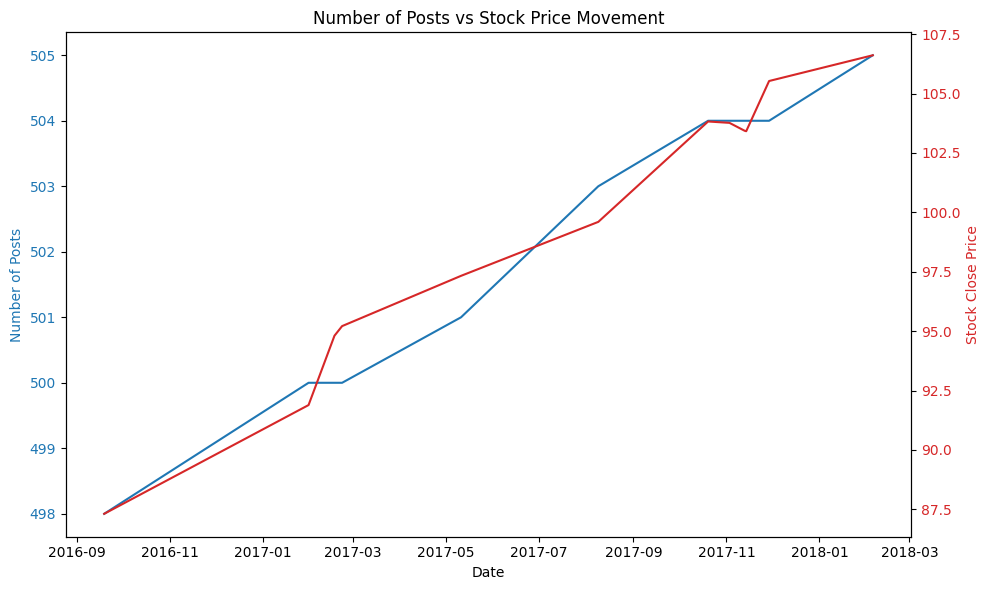

In [ ]:
# Plot the data

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot number of posts per day on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Posts', color='tab:blue')
ax1.plot(posts_per_day.index, posts_per_day, color='tab:blue', label='Number of Posts')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for stock price movement
ax2 = ax1.twinx()
ax2.set_ylabel('Stock Close Price', color='tab:red')
ax2.plot(stock_prices.index, stock_prices, color='tab:red', label='Stock Close Price')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title and show the plot
plt.title('Number of Posts vs Stock Price Movement')
fig.tight_layout()
plt.show()

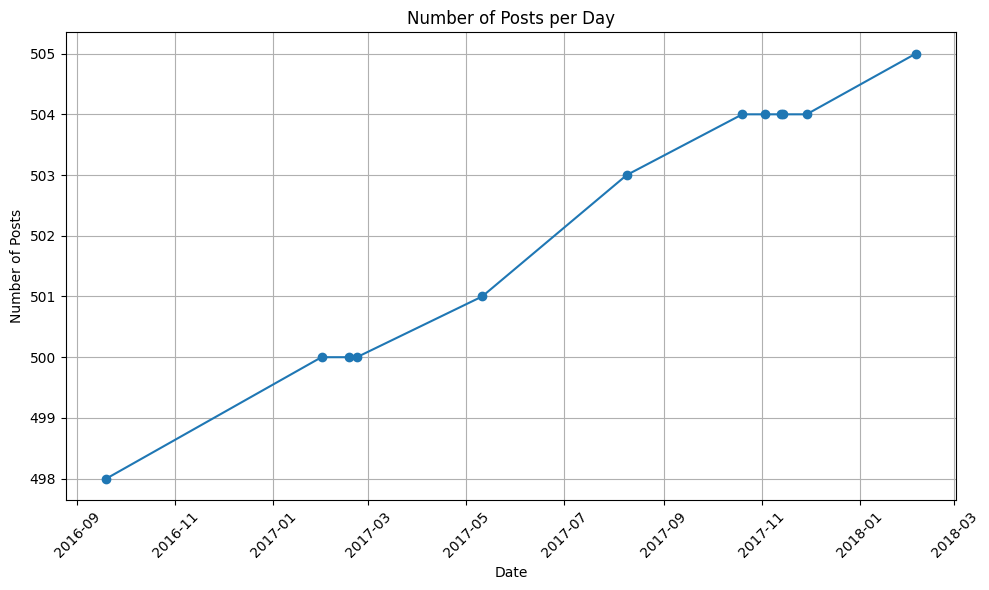

In [ ]:
### visualize post per day

posts_per_day = merged_data.groupby(merged_data['date'].dt.date).size()

# Plot the number of posts per day
plt.figure(figsize=(10, 6))
posts_per_day.plot(kind='line', marker='o')
plt.title('Number of Posts per Day')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

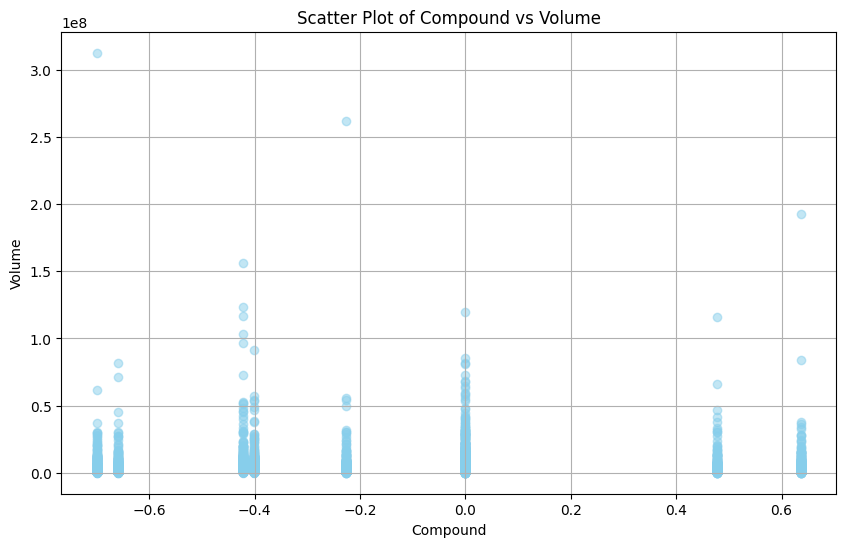

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['compound'], merged_data['volume'], alpha=0.5, color='skyblue')
plt.title('Scatter Plot of Compound vs Volume')
plt.xlabel('Compound')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

In [ ]:
## CORRELATION ANALYSIS:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
merged_data['num_comments'] = merged_data['body'].apply(lambda x: len(x.split()))

In [ ]:
merged_data['num_comments']

,num_comments
0,15
1,15
2,15
3,15
4,15
...,...
6022,4
6023,4
6024,4
6025,4


In [ ]:
merged_data.columns

Index(['body', 'score', 'created_utc', 'sentiment', 'neg', 'neu', 'pos',
       'compound', 'post_length', 'date', 'open', 'high', 'low', 'close',
       'volume', 'Name', 'num_comments'],
      dtype='object')

In [ ]:
merged_data['price_movement'] = merged_data['close'].pct_change()

In [ ]:
# Create a new column 'price_change' to store the price change between the open and close prices
merged_data['price_change'] = merged_data['close'] - merged_data['open']

In [ ]:
# Create a new column 'label' to store the binary classification (1 if the price increased, 0 if it decreased or remained the same)
merged_data['label'] = (merged_data['price_change'] > 0).astype(int)

In [ ]:
# Count the number of posts per day
posts_per_day = merged_data.groupby('date').size()

# Aggregate stock price data
stock_prices = merged_data.groupby('date')['close'].mean()

In [ ]:
# Drop unnecessary columns
merged_data = merged_data.drop(['date', 'open', 'close', 'volume', 'Name', 'price_change'], axis=1)

In [ ]:
merged_data.head()

,body,score,created_utc,sentiment,neg,neu,pos,compound,post_length,high,low,num_comments,price_movement,label
0,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,36.11,35.35,15,NaN,0
1,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,116.18,113.25,15,2.204853,0
2,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,148.97,147.44,15,0.306920,1
3,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,63.71,62.83,15,-0.576192,0
4,wow rude bot action performed automatically pl...,1,2016-09-19,"{'neg': 0.142, 'neu': 0.569, 'pos': 0.289, 'co...",0.142,0.569,0.289,0.4767,126,84.96,83.07,15,0.323478,0


In [ ]:
correlation = merged_data[['num_comments', 'price_movement']].corr()
print("Correlation between num_comments and price movement:")
print(correlation)

Correlation between num_comments and price movement:
                num_comments  price_movement
num_comments        1.000000        0.000112
price_movement      0.000112        1.000000


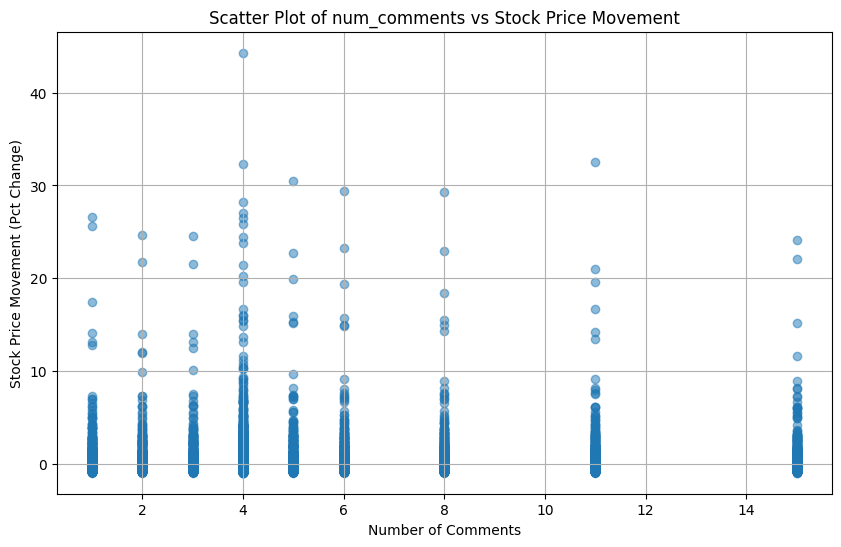

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['num_comments'], merged_data['price_movement'], alpha=0.5)
plt.title('Scatter Plot of num_comments vs Stock Price Movement')
plt.xlabel('Number of Comments')
plt.ylabel('Stock Price Movement (Pct Change)')
plt.grid(True)
plt.show()

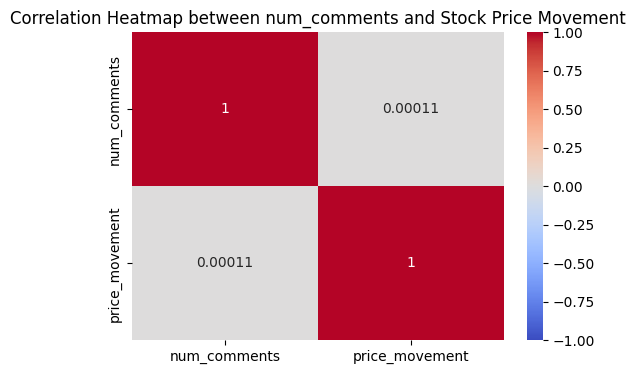

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between num_comments and Stock Price Movement')
plt.show()

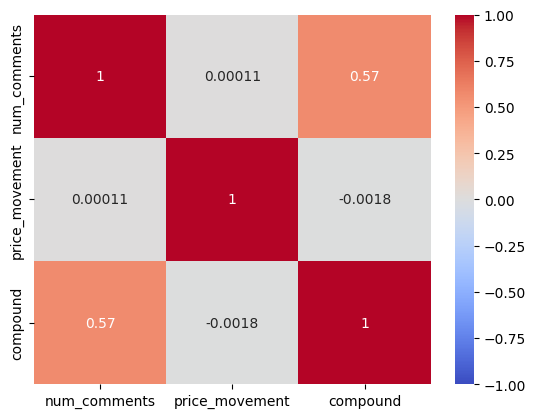

In [ ]:
# Correlation with columns 'sentiment', 'compound'
correlation = merged_data[['num_comments', 'price_movement', 'compound']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

# Model Planning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Select the features and target variable
X = merged_data[['score', 'compound', 'neg', 'neu', 'pos']]
y = merged_data['label']

In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6376451077943616
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.40      0.49       534
           1       0.63      0.83      0.72       672

    accuracy                           0.64      1206
   macro avg       0.64      0.61      0.61      1206
weighted avg       0.64      0.64      0.62      1206



# Choosing Model


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.5806938159879337
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53       891
           1       0.62      0.62      0.62      1098

    accuracy                           0.58      1989
   macro avg       0.58      0.58      0.58      1989
weighted avg       0.58      0.58      0.58      1989



In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6622443338861249
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.32      0.46       810
           1       0.63      0.94      0.75       999

    accuracy                           0.66      1809
   macro avg       0.72      0.63      0.61      1809
weighted avg       0.71      0.66      0.62      1809



In [ ]:
# Support Vector Machine
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.6489773355444998
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.40      0.50       810
           1       0.64      0.85      0.73       999

    accuracy                           0.65      1809
   macro avg       0.66      0.63      0.62      1809
weighted avg       0.66      0.65      0.63      1809



In [ ]:
# LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

lstm = Sequential()
lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units=50))
lstm.add(Dropout(0.2))
lstm.add(Dense(units=1, activation='sigmoid'))

lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32)

y_pred_lstm = (lstm.predict(X_test_lstm) > 0.5).astype('int32')
print("LSTM Accuracy:", accuracy_score(y_test, y_pred_lstm))
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5628 - loss: 0.6905
Epoch 2/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5759 - loss: 0.6815
Epoch 3/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5696 - loss: 0.6863
Epoch 4/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5759 - loss: 0.6814
Epoch 5/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5924 - loss: 0.6815
Epoch 6/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5714 - loss: 0.6825
Epoch 7/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5776 - loss: 0.6823
Epoch 8/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5797 - loss: 0.6811
Epoch 9/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5848 - loss: 0.6790
Epoch 10/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5932 - loss: 0.6770
Epoch 11/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5876 - loss: 0.6727
Epoch 12/50
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5804311774461028
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.40      0.46       810
           1       0.60      0.73      0.66       999

    accuracy                           0.58      1809
   macro avg       0.57      0.56      0.56      1809
weighted avg       0.57      0.58      0.57      1809



In [ ]:
# Hypertuning Random Forest and Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Prepare the hyperparameter grid for Random Forest
random_forest_params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Prepare the hyperparameter grid for Decision Tree
decision_tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Instantiate the models
random_forest_model = RandomForestClassifier()
decision_tree_model = DecisionTreeClassifier()

In [ ]:
# Create GridSearchCV objects for each model
random_forest_grid = GridSearchCV(estimator=random_forest_model, param_grid=random_forest_params, cv=5, n_jobs=-1)
decision_tree_grid = GridSearchCV(estimator=decision_tree_model, param_grid=decision_tree_params, cv=5, n_jobs=-1)

In [ ]:
# Fit the models with the hyperparameter grids
random_forest_grid.fit(X_train, y_train)
decision_tree_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
482 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
# Get the best parameters for each model
best_rf_params = random_forest_grid.best_params_
best_dt_params = decision_tree_grid.best_params_

print("Best Random Forest Parameters: ", best_rf_params)
print("Best Decision Tree Parameters: ", best_dt_params)

Best Random Forest Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Decision Tree Parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Train the models with the best parameters
best_random_forest = RandomForestClassifier(**best_rf_params)
best_decision_tree = DecisionTreeClassifier(**best_dt_params)

best_random_forest.fit(X_train, y_train)
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

In [ ]:
# Evaluate the models
rf_accuracy = best_random_forest.score(X_test, y_test)
dt_accuracy = best_decision_tree.score(X_test, y_test)

print("Tuned Random Forest Accuracy: ", rf_accuracy)
print("Tuned Decision Tree Accuracy: ", dt_accuracy)

Tuned Random Forest Accuracy:  0.6622443338861249
Tuned Decision Tree Accuracy:  0.6622443338861249


In [ ]:
merged_data['price_volatility'] = merged_data['high'] - merged_data['low']


In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = merged_data[['compound', 'score', 'price_volatility']]
y = merged_data['label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.5902463549522373
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.15      0.24       891
           1       0.58      0.95      0.72      1098

    accuracy                           0.59      1989
   macro avg       0.64      0.55      0.48      1989
weighted avg       0.63      0.59      0.51      1989



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.624937154348919
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.32      0.43       891
           1       0.61      0.87      0.72      1098

    accuracy                           0.62      1989
   macro avg       0.64      0.60      0.58      1989
weighted avg       0.64      0.62      0.59      1989



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Preparing the data for LSTM
X = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
y = y_train.values

# Defining the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")

lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", lstm_accuracy)
print("LSTM Classification Report:\n", classification_report(y_test, y_pred_lstm))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5555 - loss: 0.6866
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5577 - loss: 0.6815
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5707 - loss: 0.6764
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5644 - loss: 0.6838
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5834 - loss: 0.6745
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5807 - loss: 0.6748
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6002 - loss: 0.6697
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5846 - loss: 0.6746
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5876 - loss: 0.6714
Epoch 10/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5825 - loss: 0.6736
Epoch 11/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5948 - loss: 0.6696
Epoch 12/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the merged dataset
merged_data = pd.read_csv('merged_data.csv')

In [ ]:
merged_data['price_volatility'] = merged_data['high'] - merged_data['low']

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = merged_data[['compound', 'score', 'price_volatility']]
y = merged_data['label']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

y_pred_svm = svm_clf.predict(X_test)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

import pickle

with open('svm_stock_price_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)

SVM Accuracy: 0.5577000402090873
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.74      0.62      1218
           1       0.60      0.39      0.47      1269

    accuracy                           0.56      2487
   macro avg       0.57      0.56      0.55      2487
weighted avg       0.57      0.56      0.54      2487



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.6324889425010052
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      1218
           1       0.63      0.66      0.65      1269

    accuracy                           0.63      2487
   macro avg       0.63      0.63      0.63      2487
weighted avg       0.63      0.63      0.63      2487



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

import pickle

with open('stock_price_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)


Gradient Boosting Accuracy: 0.6324889425010052
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.60      0.61      1218
           1       0.63      0.66      0.65      1269

    accuracy                           0.63      2487
   macro avg       0.63      0.63      0.63      2487
weighted avg       0.63      0.63      0.63      2487



In [ ]:
import pickle

with open('stock_price_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)
